In [1]:
from scipy.io import arff
import sklearn.cluster as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time as t
import random as rd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan

(array([(-0.1     , 0.5     , b'0'), (-0.100126, 0.510052, b'0'),
       (-0.100505, 0.520098, b'0'), (-0.101136, 0.530131, b'0'),
       (-0.10202 , 0.540145, b'0'), (-0.103154, 0.550133, b'0'),
       (-0.104539, 0.56009 , b'0'), (-0.106174, 0.570009, b'0'),
       (-0.108058, 0.579884, b'0'), (-0.110189, 0.589708, b'0'),
       (-0.112567, 0.599476, b'0'), (-0.115189, 0.609181, b'0'),
       (-0.118054, 0.618817, b'0'), (-0.121161, 0.628377, b'0'),
       (-0.124506, 0.637857, b'0'), (-0.128089, 0.64725 , b'0'),
       (-0.131907, 0.656549, b'0'), (-0.135958, 0.66575 , b'0'),
       (-0.140238, 0.674846, b'0'), (-0.144745, 0.683832, b'0'),
       (-0.149477, 0.692701, b'0'), (-0.154431, 0.701449, b'0'),
       (-0.159602, 0.71007 , b'0'), (-0.164989, 0.718558, b'0'),
       (-0.170587, 0.726908, b'0'), (-0.176393, 0.735114, b'0'),
       (-0.182404, 0.743172, b'0'), (-0.188615, 0.751077, b'0'),
       (-0.195023, 0.758822, b'0'), (-0.201624, 0.766405, b'0'),
       (-0.208413, 0.773

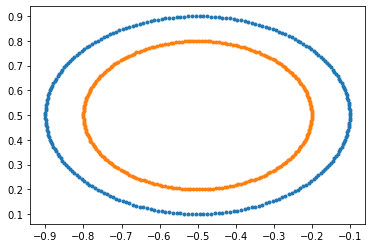

In [52]:
data = arff.loadarff(open("artificial/dartboard1.arff","r"))
print(data)

x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == 0]
y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == 0]

plt.plot(x,y,'.')
plt.plot(x2,y2,'.')
plt.show()

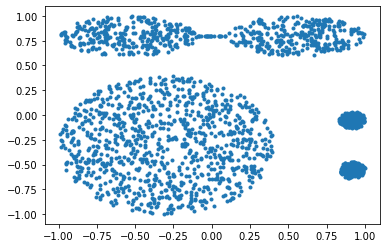

In [26]:
data = arff.loadarff(open("artificial/cure-t1-2000n-2D.arff","r"))
x = [data[0][i][0] for i in range(len(data[0]))]
y = [data[0][i][1] for i in range(len(data[0]))]

plt.plot(x,y,'.')
#plt.plot(x2,y2,'.')
plt.show()

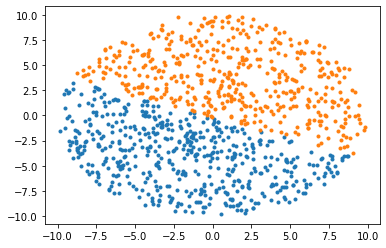

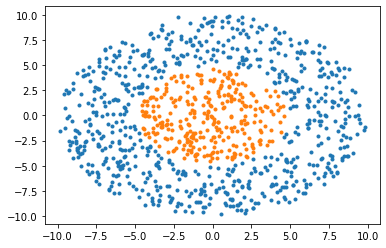

In [248]:
#Kmeans

nb_cluster_reel = max([int(data[0][i][2]) for i in range(len(data[0]))]) + 1

data2 = [[e[0],e[1]] for e in data[0]]
kmeans = sk.KMeans(n_clusters=2, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

for j in range(nb_cluster_reel):
    x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    plt.plot(x,y,'.')
    
plt.show()

Temps écoulé :0.38768792152404785s


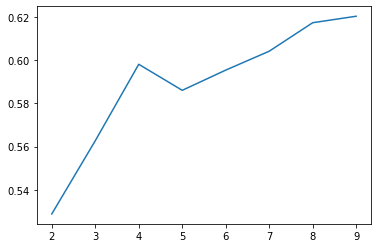

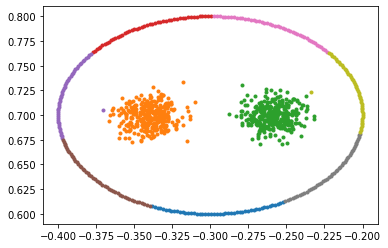

In [105]:
#Keans Silhouette
score = [0]*8
ti = t.time()
for nb_cluster in range(2,10):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.silhouette_score(data2, labels)
ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :0.8097920417785645s


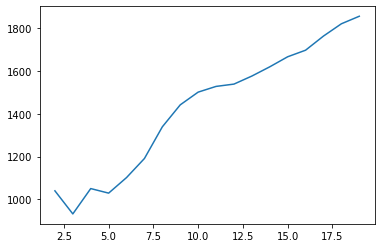

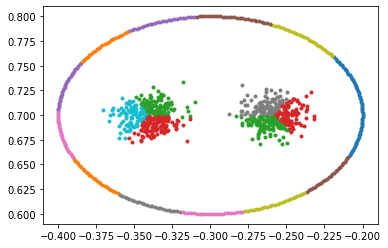

In [106]:
score = [0]*18
ti = t.time()
for nb_cluster in range(2,20):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.calinski_harabasz_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,20),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range (len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :0.3428955078125s


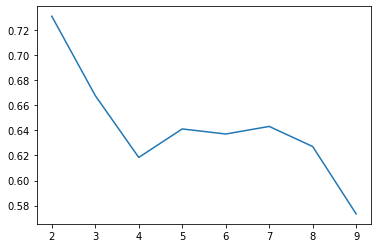

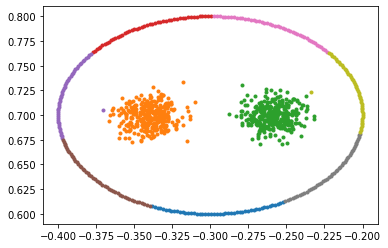

In [107]:
score = [0]*8
ti = t.time()
for nb_cluster in range(2,10):
    kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
    labels = kmeans.labels_
    score[nb_cluster - 2] = metrics.davies_bouldin_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(min(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

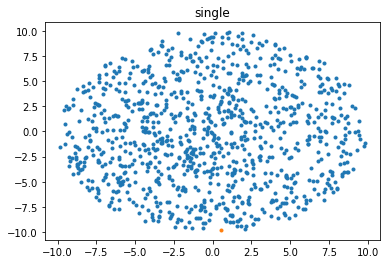

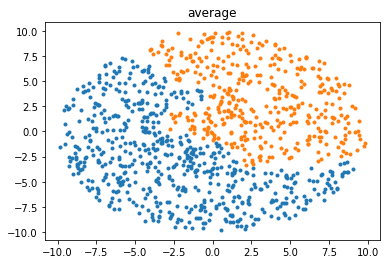

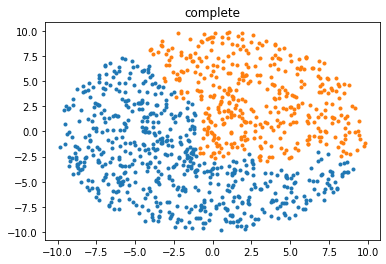

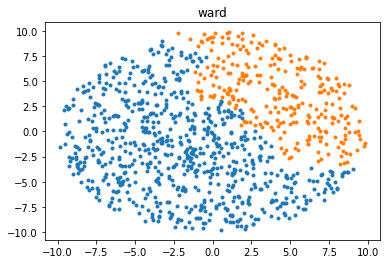

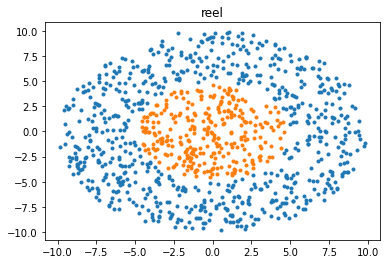

In [250]:
#Agglomératif

nb_cluster_reel = max([int(data[0][i][2]) for i in range(len(data[0]))]) + 1

data2 = [[e[0],e[1]] for e in data[0]]

for linkage in ["single", "average", "complete", "ward"]:
    
    clustering = AgglomerativeClustering(2, linkage = linkage).fit(data2)
    for i in range(max(clustering.labels_) + 1):
        x = [data2[j][0] for j in range(len(data2)) if clustering.labels_[j] == i]
        y = [data2[j][1] for j in range(len(data2)) if clustering.labels_[j] == i]
        plt.plot(x,y,'.')
    plt.title(linkage)
    plt.show()

for j in range(nb_cluster_reel):
    x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    plt.title("reel")
    plt.plot(x,y,'.')
    
plt.show()

Temps écoulé :0.17732810974121094s


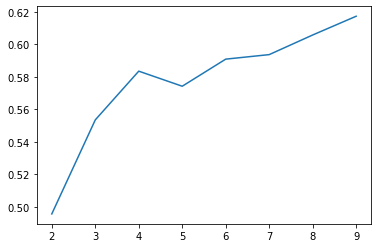

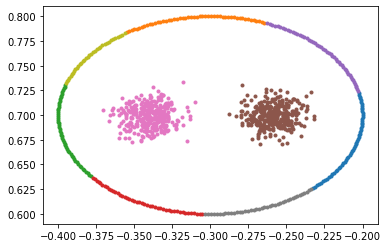

In [109]:
#Agglomération Silhouette
score = [0]*8
ti = t.time()

for nb_cluster in range(2,10):
    clustering = AgglomerativeClustering(nb_cluster).fit(data2)
    labels = clustering.labels_
    score[nb_cluster - 2] = metrics.silhouette_score(data2, labels)
ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

clustering = AgglomerativeClustering(nb_cluster).fit(data2)
for i in range(max(clustering.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if clustering.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if clustering.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :0.21033024787902832s


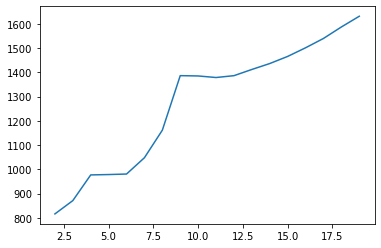

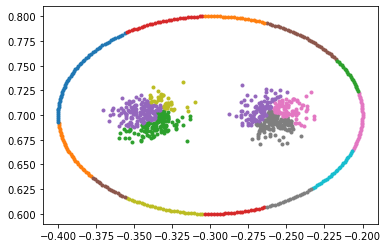

In [110]:
#Agglomération calinski_harabaz
score = [0]*18
ti = t.time()
for nb_cluster in range(2,20):
    clustering = AgglomerativeClustering(nb_cluster).fit(data2)
    labels = clustering.labels_
    score[nb_cluster - 2] = metrics.calinski_harabasz_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,20),score)
plt.show()
nb_cluster = score.index(max(score)) + 2

clustering = AgglomerativeClustering(nb_cluster).fit(data2)
for i in range(max(clustering.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if clustering.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if clustering.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

Temps écoulé :0.10373830795288086s


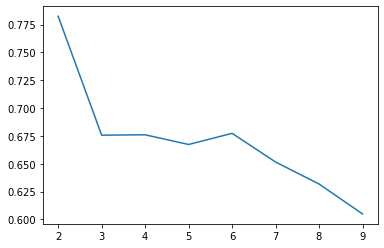

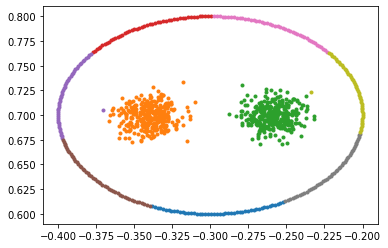

In [111]:
#Agglomération
score = [0]*8
ti = t.time()
for nb_cluster in range(2,10):
    clustering = AgglomerativeClustering(nb_cluster).fit(data2)
    labels = clustering.labels_
    score[nb_cluster - 2] = metrics.davies_bouldin_score(data2, labels)

ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s") 
plt.plot(range(2,10),score)
plt.show()
nb_cluster = score.index(min(score)) + 2

kmeans = sk.KMeans(n_clusters=nb_cluster, random_state=0).fit(data2)
for i in range(max(kmeans.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if kmeans.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if kmeans.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

eps = 1.5478573702749143
min_samples = 5


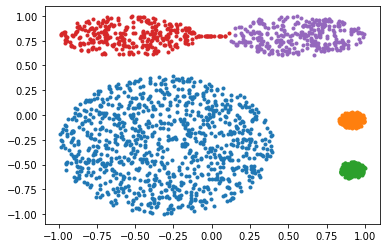

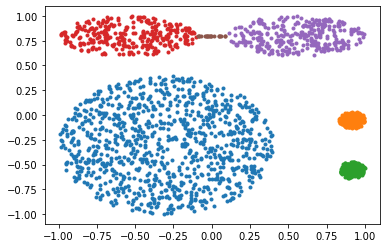

In [55]:
#DBSCAN

nb_cluster_reel = max([int(data[0][i][2]) for i in range(len(data[0]))]) + 1

data2 = [[e[0],e[1]] for e in data[0]]

random_eps = (1 - rd.random()) * 5 
print("eps =", random_eps)

random_min_samples = rd.randint(1,45)
print("min_samples =", random_min_samples)

clustering = DBSCAN(eps = 0.16, min_samples = 45).fit(data2)
for i in range(max(clustering.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if clustering.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if clustering.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

for j in range(nb_cluster_reel):
    x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == j]
    plt.plot(x,y,'.')
    
plt.show()


In [41]:
#DBSCAN Silhouette
nb_eps = 50
nb_min_samples = 10

dist_max = 0
for pt1 in data2:
    for pt2 in data2:
        dist_max = max(np.linalg.norm(np.array(pt1) - np.array(pt2)),dist_max)

score = np.array([[0. for i in range(nb_eps - 1)] for j in range(nb_min_samples - 1)])
ti = t.time()

for index_eps,eps in enumerate(np.linspace(dist_max/100,dist_max,nb_eps)):
    print(eps)
    for min_samples in range(1,nb_min_samples):
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(data2)
        labels = clustering.labels_
        if max(labels)>=1:
            score[min_samples - 1][index_eps - 1] = metrics.silhouette_score(data2, labels)
        else:
            score[min_samples - 1][index_eps - 1] = 0
ti = t.time() - ti
print("Temps écoulé :" + str(ti) + "s")
#fig = plt.figure()
#ax = fig.gca(projection = '3d')
#ax.plot(range(1,nb_eps), range(1,nb_min_samples),score)
#plt.show()
m = score.max()
print(score)
print(m)
min_samples = np.where(score == m)[0][0]
eps = np.where(score == m)[1][0]
print("eps =", np.linspace(dist_max/100,dist_max,nb_eps+1)[(eps + 1)], "min_samples =", min_samples + 1)
clustering = DBSCAN(eps = np.linspace(dist_max/100,dist_max,nb_eps+1)[(eps + 1)], min_samples = min_samples + 1).fit(data2)
for i in range(max(clustering.labels_) + 1):
    x = [data2[j][0] for j in range(len(data2)) if clustering.labels_[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if clustering.labels_[j] == i]
    plt.plot(x,y,'.')
plt.show()

KeyboardInterrupt: 

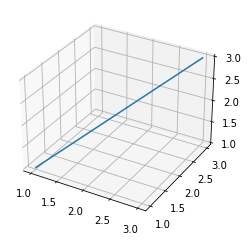

In [66]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot([1,2,3],[1,2,3],[1,2,3])
plt.show()

In [82]:
score = np.array([[0 for i in range(nb_eps - 1)] for j in range(nb_min_samples - 1)])

In [149]:
dist

0.1999985869200081

(array([0, 2, 3]), array([1, 1, 1]))

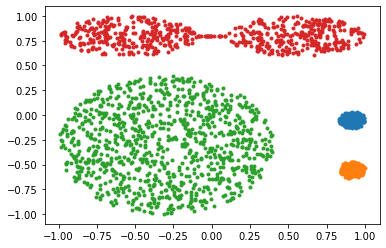

In [35]:
#HDBSCAN
#np.where(data=='noise','-1', data)
#nb_cluster_reel = max([int(data[0][i][2]) for i in range(len(data[0]))]) + 1

data2 = [[e[0],e[1]] for e in data[0]]

clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
labels = clusterer.fit_predict(data2)

for i in range(max(labels) + 1):
    x = [data2[j][0] for j in range(len(data2)) if labels[j] == i]
    y = [data2[j][1] for j in range(len(data2)) if labels[j] == i]
    plt.plot(x,y,'.')
plt.show()

#for j in range(nb_cluster_reel):
#    x = [data[0][i][0] for i in range(len(data[0])) if int(data[0][i][2]) == j]
#    y = [data[0][i][1] for i in range(len(data[0])) if int(data[0][i][2]) == j]
#    plt.plot(x,y,'.')
    
plt.show()

